In [31]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
import matplotlib.pyplot as plt

# **Prepare the Data**

In [33]:
# Model / data parameters
num_classes = 10

In [34]:
input_shape = (28, 28, 1)

In [35]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
y_train.shape

(60000,)

In [38]:
x_test.shape

(10000, 28, 28)

In [39]:
y_test.shape

(10000,)

In [40]:
x_train[0].shape

(28, 28)

In [41]:
y_train[10000]

3

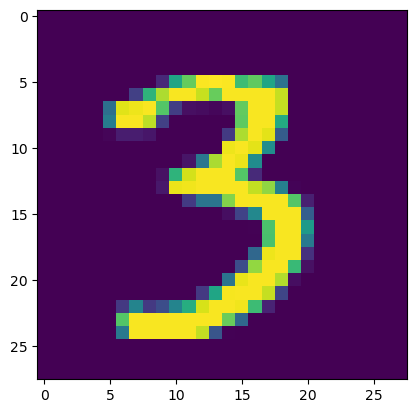

In [42]:
plt.imshow(x_train[10000]) 

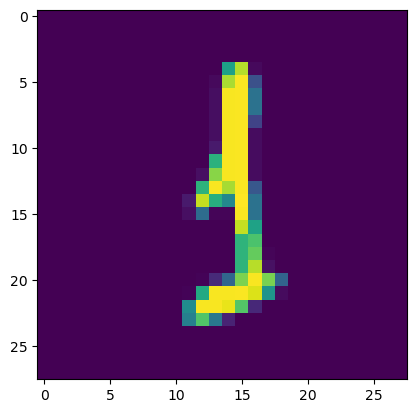

In [43]:
plt.imshow(x_test[900])

In [44]:
y_test[900]

1

In [45]:
x_train[100].shape

(28, 28)

In [46]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


In [47]:
x_test[100].shape

(28, 28)

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [50]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [51]:
y_train[59999]

8

In [52]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [54]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# **Prepare the model**

In [55]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

# Train the model

In [57]:
batch_size = 64
epochs = 2

- Input image = 60,000
  - Based on 0.1 Validation split
  - 6000 Validation
  - 54000 Training
- Batch - 128 
  - 54000/128 = 422



In [58]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [59]:
model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 24s 30ms/step - loss: 0.3047 - accuracy: 0.9051 - val_loss: 0.0858 - val_accuracy: 0.9761
Epoch 2/2
750/750 [==============================] - 23s 30ms/step - loss: 0.1059 - accuracy: 0.9679 - val_loss: 0.0692 - val_accuracy: 0.9793


# **Evaluate the model**

In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05833657085895538
Test accuracy: 0.9812999963760376
